In [12]:
try:
    import gplearn
except:
    !pip install gplearn
        
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import math
import numpy as np
import matplotlib.pyplot as plt

## Defining Analytic Functions

In [28]:
# Deviations used to avoid zero input
a_sqrt_d = 0.1
a_ln_d = 0.5
a_aq_d = 0.5


def _analytic_sqrt(x_arr):
    """Analytic square root
    """
    f = lambda x : math.sqrt(math.sqrt(a_sqrt_d + x * x))
    f = np.vectorize(f)
    return f(x_arr)

def _analytic_log(x_arr):
    """Analytic natural logarithm
    """
    f = lambda x : math.log(math.sqrt(a_ln_d + x * x))
    f = np.vectorize(f)
    return f(x_arr)

def _analytic_quotient(num_arr, den_arr):
    """Analytic Quotient
    """
    f = lambda num, den : num/math.sqrt(a_aq_d + den * den)
    f = np.vectorize(f)
    return f(num_arr, den_arr)

# Factory generating the functions used inside gplearn
analytic_log = make_function(function=_analytic_log,
                        name='aln',
                        arity=1)

analytic_sqrt = make_function(function=_analytic_sqrt,
                        name='asqrt',
                        arity=1)

analytic_quotient = make_function(function=_analytic_quotient,
                        name='aq',
                        arity=2)

## Function sets adopted

In [70]:
f_set_analytic = ['add', 'sub', 'mul', analytic_quotient, analytic_log, analytic_sqrt]
f_set_protec = ['add', 'sub', 'mul', 'div', 'log', 'sqrt']
f_set_sqrt_quot_an = ['add', 'sub', 'mul', analytic_quotient, analytic_sqrt]

## Defining a testbed
I was trying to plot some new non-linear functions using sqrt and ln to test the analytic operators.

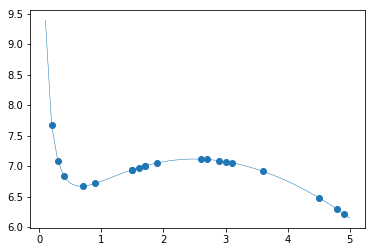

In [77]:
def func_1(x_arr):
    f = lambda x : ((10-x)/2)*(2*x+1)/(2*math.sqrt(x))
    f = np.vectorize(f)
    return f(x_arr)

x_ts = {'func_1' : np.linspace(0.1, 5, num=50)}
x_tr = {'func_1' : np.random.choice(x_ts['func_1'], 20)}
y_tr = {'func_1' : func_1(x_tr['func_1'])}
y_ts = {'func_1' : func_1(x_ts['func_1'])}

plt.scatter(x_tr['func_1'], y_tr['func_1'])
plt.plot(x_ts['func_1'], y_ts['func_1'], linewidth=0.5)

plt.show()

In [82]:
y_ts_hat = {'sqrt_quot_an' : {}}

model = SymbolicRegressor(function_set = f_set_sqrt_quot_an,
                          population_size=500, metric='rmse', 
                          generations=20, verbose=1,
                          stopping_criteria=0.01, max_samples=0.9,
                          p_crossover=0.7, p_subtree_mutation=0.1,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          parsimony_coefficient=0.02, random_state=0)

model.fit(x_tr['func_1'].reshape(-1, 1), y_tr['func_1'].reshape(-1, 1))
y_ts_hat['sqrt_quot_an']['func_1'] = model.predict(x_ts['func_1'].reshape(-1, 1))



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.16    50.8756521758       15    1.82809938723    2.91131296203     15.35s
   1    23.04    4.80616359808       77    1.54283385259    3.04845314391     22.98s
   2    23.92    3.79434818892       33    1.23192486277    1.59938290961     25.27s
   3    20.67    3.18726360779       27   0.405681244503    0.47111150593     26.85s
   4    25.11     2.5883162102       27    0.40942113952   0.441033417009     27.62s
   5    25.63    2.57041712568       54   0.330375728153   0.354321861169     25.95s
   6    26.06    2.47483109521       27   0.323040829764   0.874038386479     25.04s
   7    25.57    2.22259178787       28   0.253311674494   0.536911367563     23.50s
   8    24.95    2.22308372154       28   0.286705776311   0.354927086888  

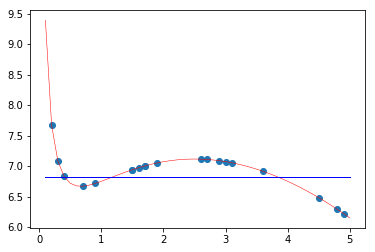

In [83]:
plt.scatter(x_tr['func_1'], y_tr['func_1'])
plt.plot(x_ts['func_1'], y_ts['func_1'], linewidth=0.5, color='red')

plt.plot(x_ts['func_1'], y_ts_hat['sqrt_quot_an']['func_1'], linewidth=1, color='blue')

plt.show()